<a href="https://colab.research.google.com/github/naimishaawasthi14/naimisha/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of selected features: 91
Selected Features: Index(['transact', 'onServiceConnected', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.net.URLDecoder', 'READ_PHONE_STATE', 'ClassLoader',
       'Landroid.content.Context.registerReceiver',
       'Ljava.lang.Class.getField',
       'Landroid.content.Context.unregisterReceiver', 'GET_ACCOUNTS',
       'Ljava.lang.Class.getDeclaredField', 'READ_SMS',
       'Ljavax.crypto.spec.SecretKeySpec',
       'android.intent.action.BOOT_COMPLETED', 'USE_CREDENTIALS',
       'MANAGE_ACCOUNTS', 'android.content.pm.PackageInfo', 'HttpGet.init',
       'Ljava.lang.Class.getMethod', 'System.loadLibrary',
       'android.intent.action.SEND', 'Ljavax.crypto.Cipher',
       'android.telephony.gsm.SmsManager', 'WRITE_HISTORY_BOOKMARKS',
       'TelephonyManager.getSubscriberId', 'INSTALL_PACKAGES', 'CAMERA',
       'Ljava.lang.Object

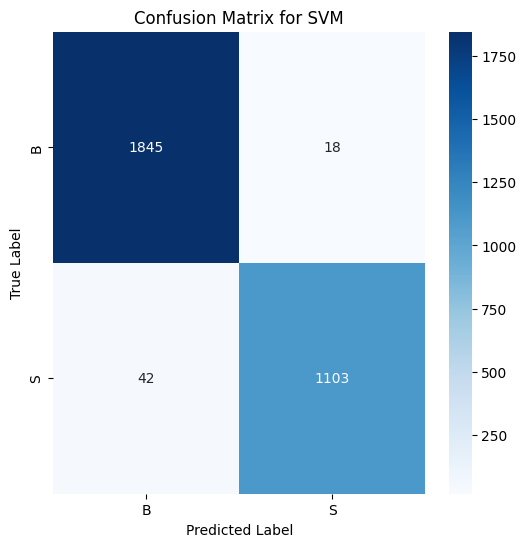

SVM classification report:
              precision    recall  f1-score   support

           B       0.98      0.99      0.98      1863
           S       0.98      0.96      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



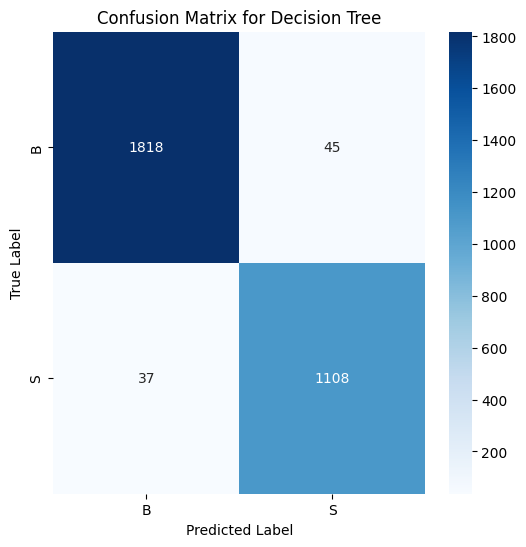

Decision Tree classification report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98      1863
           S       0.96      0.97      0.96      1145

    accuracy                           0.97      3008
   macro avg       0.97      0.97      0.97      3008
weighted avg       0.97      0.97      0.97      3008



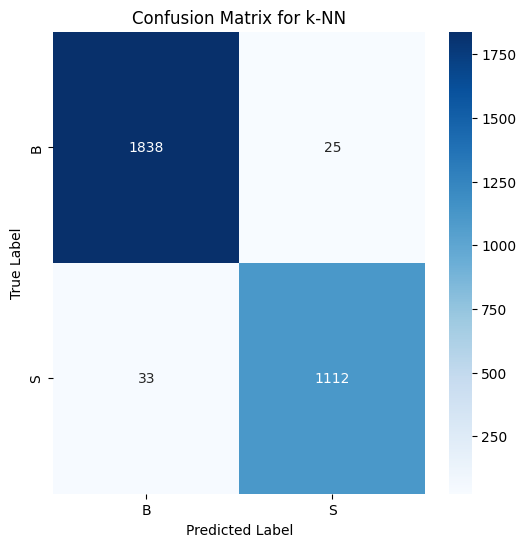

k-NN classification report:
              precision    recall  f1-score   support

           B       0.98      0.99      0.98      1863
           S       0.98      0.97      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



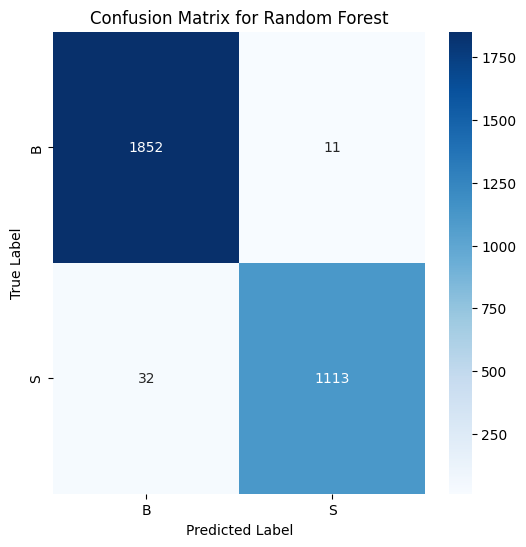

Random Forest classification report:
              precision    recall  f1-score   support

           B       0.98      0.99      0.99      1863
           S       0.99      0.97      0.98      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.98      0.98      3008
weighted avg       0.99      0.99      0.99      3008



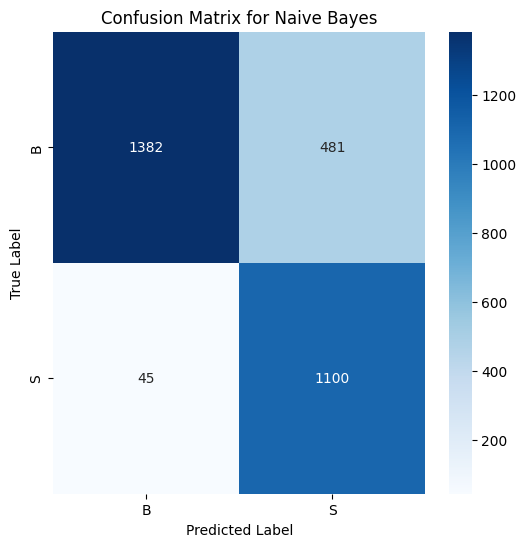

Naive Bayes classification report:
              precision    recall  f1-score   support

           B       0.97      0.74      0.84      1863
           S       0.70      0.96      0.81      1145

    accuracy                           0.83      3008
   macro avg       0.83      0.85      0.82      3008
weighted avg       0.86      0.83      0.83      3008



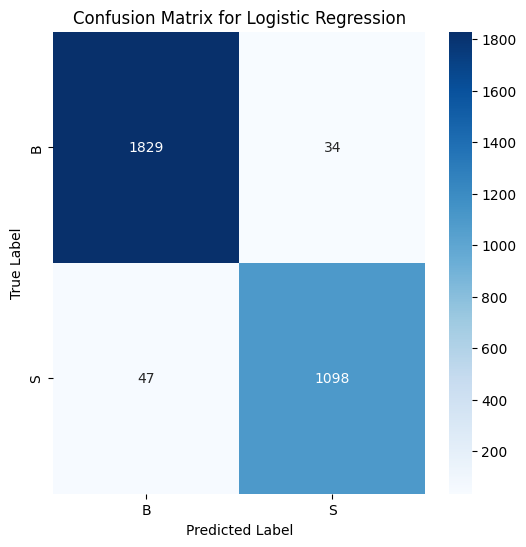

Logistic Regression classification report:
              precision    recall  f1-score   support

           B       0.97      0.98      0.98      1863
           S       0.97      0.96      0.96      1145

    accuracy                           0.97      3008
   macro avg       0.97      0.97      0.97      3008
weighted avg       0.97      0.97      0.97      3008



In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your malware dataset
malware_dataset_path = 'malwarebenign.csv'
malware_data = pd.read_csv('malwarebenign.csv', dtype={'column_92': str}, low_memory=False)

# Assuming 'df' is your DataFrame
malware_data.replace('?', 0, inplace=True)  # Replace '?' with 0

# Separate features (X) and target (y)
X = malware_data.drop('class', axis=1)  # Replace 'target_column_name' with the actual target column name
y = malware_data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Create RFECV object
rfe = RFECV(estimator=dt_classifier, cv=5)

# Drop rows with NaN values
X_train_no_nan = X_train.dropna()
y_train_no_nan = y_train.loc[X_train_no_nan.index]

# Fit RFECV
rfe.fit(X_train_no_nan, y_train_no_nan)

# Print the number of selected features
num_selected_features = rfe.n_features_
print("Number of selected features:", num_selected_features)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Define classifiers
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate classifiers with selected features
for clf_name, clf in classifiers.items():
    clf.fit(X_train[selected_features], y_train)
    y_pred = clf.predict(X_test[selected_features])

    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()

    # Display classification report
    print(f"{clf_name} classification report:\n{cr}")


In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your malware dataset
malware_dataset_path = 'malwarebenign.csv'
malware_data = pd.read_csv('malwarebenign.csv', dtype={'column_92': str}, low_memory=False)

# Assuming 'df' is your DataFrame
malware_data.replace('?', 0, inplace=True)  # Replace '?' with 0

# Separate features (X) and target (y)
X = malware_data.drop('class', axis=1)  # Replace 'target_column_name' with the actual target column name
y = malware_data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RFECV object with KNeighborsClassifier as the estimator
rfe = RFECV(estimator=KNeighborsClassifier(), cv=5)

# Fit RFECV
rfe.fit(X_train, y_train)

# Print the number of selected features
num_selected_features = rfe.n_features_
print("Number of selected features:", num_selected_features)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Define classifiers
classifiers = {
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate classifiers with selected features
for clf_name, clf in classifiers.items():
    clf.fit(X_train[selected_features], y_train)
    y_pred = clf.predict(X_test[selected_features])

    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()

    # Display classification report
    print(f"{clf_name} classification report:\n{cr}")


ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

Number of selected features: 155
Selected Features: Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'GET_PACKAGE_SIZE', 'MODIFY_PHONE_STATE',
       'CHANGE_COMPONENT_ENABLED_STATE', 'CLEAR_APP_CACHE', 'READ_CONTACTS',
       'DEVICE_POWER', 'ACCESS_WIFI_STATE', 'WRITE_EXTERNAL_STORAGE',
       'ACCESS_FINE_LOCATION', 'WRITE_SECURE_SETTINGS'],
      dtype='object', length=155)


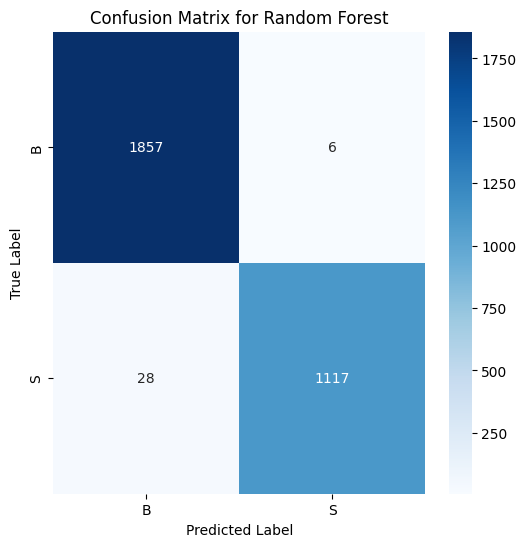

Random Forest classification report:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99      1863
           S       0.99      0.98      0.99      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008



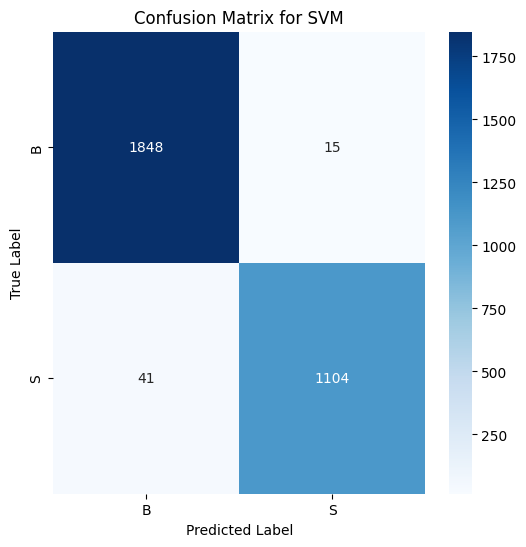

SVM classification report:
              precision    recall  f1-score   support

           B       0.98      0.99      0.99      1863
           S       0.99      0.96      0.98      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



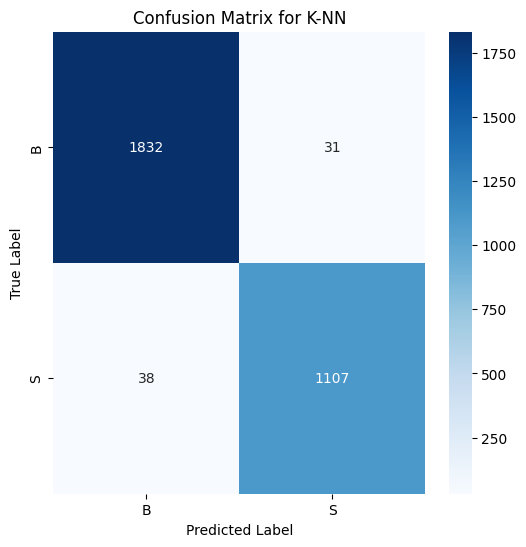

K-NN classification report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98      1863
           S       0.97      0.97      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



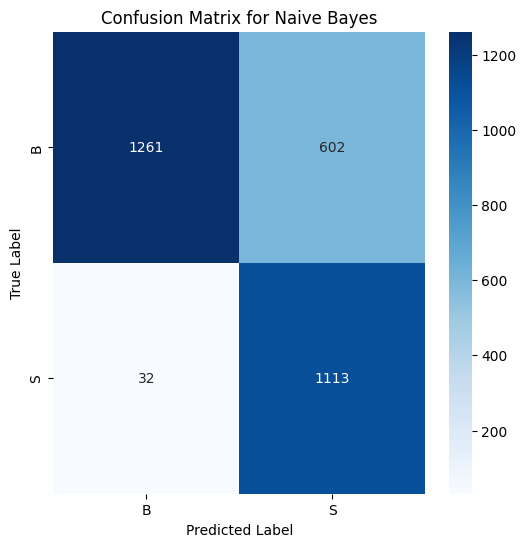

Naive Bayes classification report:
              precision    recall  f1-score   support

           B       0.98      0.68      0.80      1863
           S       0.65      0.97      0.78      1145

    accuracy                           0.79      3008
   macro avg       0.81      0.82      0.79      3008
weighted avg       0.85      0.79      0.79      3008



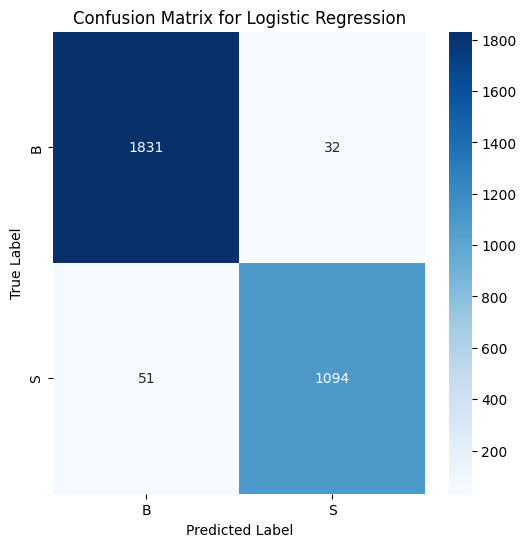

Logistic Regression classification report:
              precision    recall  f1-score   support

           B       0.97      0.98      0.98      1863
           S       0.97      0.96      0.96      1145

    accuracy                           0.97      3008
   macro avg       0.97      0.97      0.97      3008
weighted avg       0.97      0.97      0.97      3008



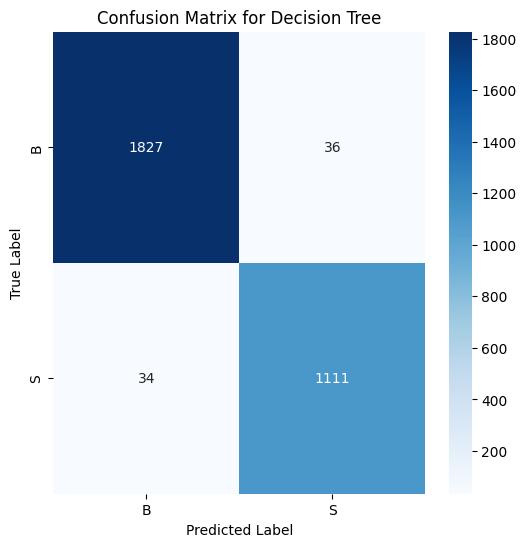

Decision Tree classification report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98      1863
           S       0.97      0.97      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your malware dataset
malware_dataset_path = 'malwarebenign.csv'
malware_data = pd.read_csv('malwarebenign.csv', dtype={'column_92': str}, low_memory=False)

# Assuming 'df' is your DataFrame
malware_data.replace('?', 0, inplace=True)  # Replace '?' with 0

# Separate features (X) and target (y)
X = malware_data.drop('class', axis=1)  # Replace 'target_column_name' with the actual target column name
y = malware_data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RFECV object with RandomForestClassifier as the estimator
rfe = RFECV(estimator=RandomForestClassifier(), cv=5)

# Fit RFECV
rfe.fit(X_train, y_train)

# Print the number of selected features
num_selected_features = rfe.n_features_
print("Number of selected features:", num_selected_features)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate classifiers with selected features
for clf_name, clf in classifiers.items():
    clf.fit(X_train[selected_features], y_train)
    y_pred = clf.predict(X_test[selected_features])

    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()

    # Display classification report
    print(f"{clf_name} classification report:\n{cr}")


In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your malware dataset
malware_dataset_path = 'malwarebenign.csv'
malware_data = pd.read_csv('malwarebenign.csv', dtype={'column_92': str}, low_memory=False)

# Assuming 'df' is your DataFrame
malware_data.replace('?', 0, inplace=True)  # Replace '?' with 0

# Separate features (X) and target (y)
X = malware_data.drop('class', axis=1)  # Replace 'target_column_name' with the actual target column name
y = malware_data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RFECV object with SVC (linear kernel) as the estimator
rfe = RFECV(estimator=SVC(kernel='linear'), cv=5)

# Fit RFECV
rfe.fit(X_train, y_train)

# Print the number of selected features
num_selected_features = rfe.n_features_
print("Number of selected features:", num_selected_features)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Number of selected features: 194
Selected Features: Index(['transact', 'onServiceConnected', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast', 'Ljava.net.URLDecoder',
       ...
       'SET_ORIENTATION', 'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST',
       'ACCESS_WIFI_STATE', 'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION',
       'SET_WALLPAPER_HINTS', 'SET_PREFERRED_APPLICATIONS',
       'WRITE_SECURE_SETTINGS'],
      dtype='object', length=194)


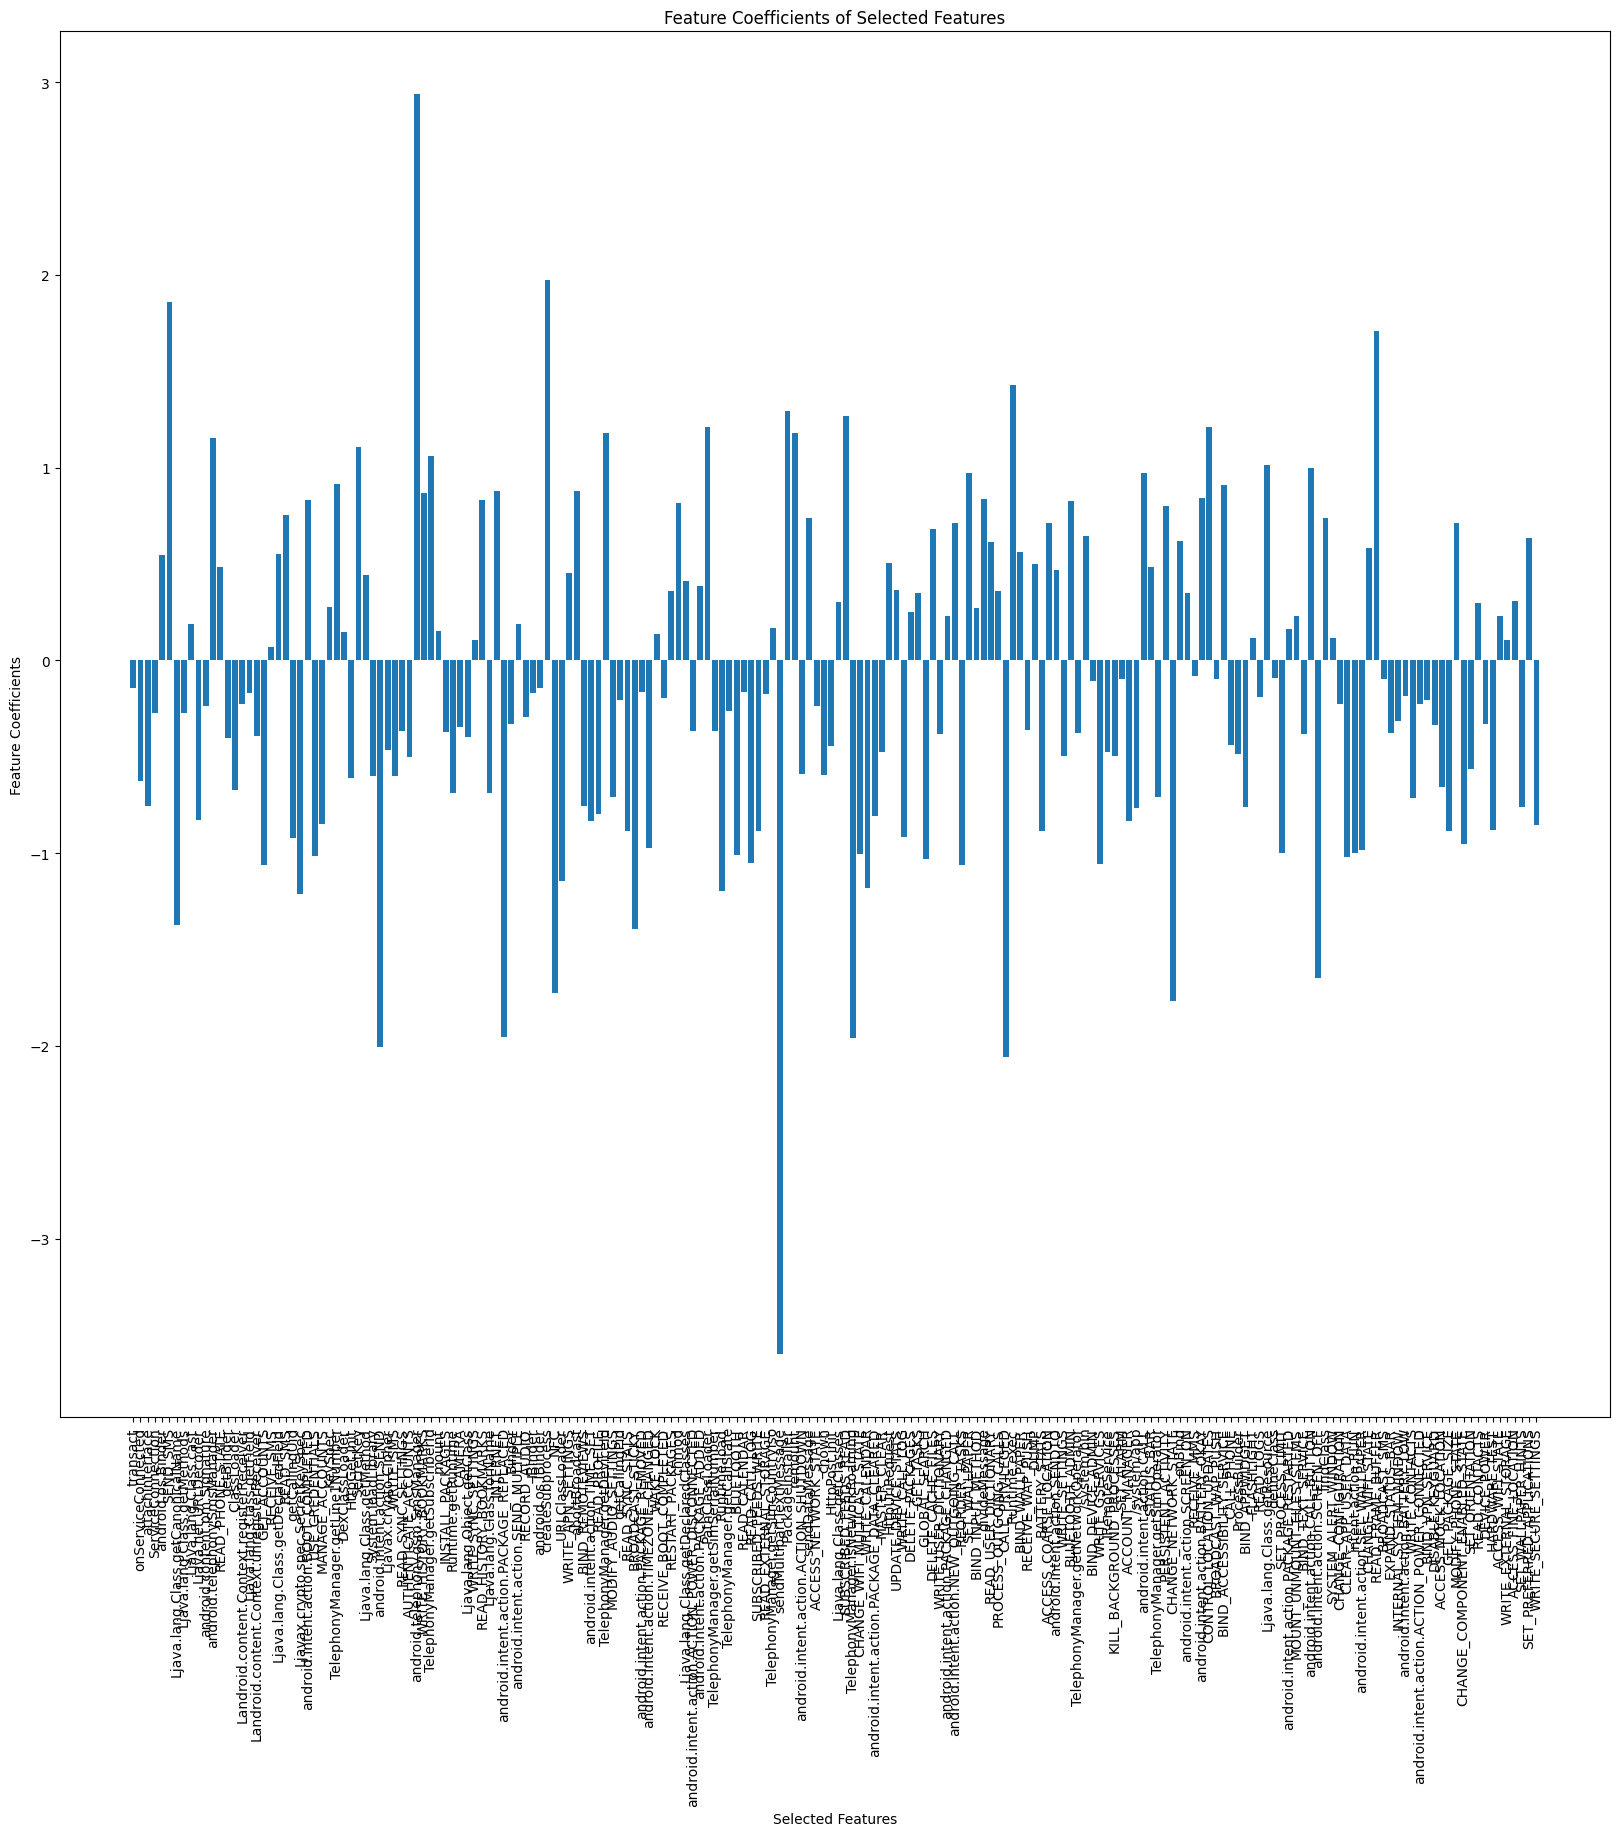

In [18]:
import matplotlib.pyplot as plt

# Get feature coefficients from RFECV's estimator (SVC)
feature_coefficients = rfe.estimator_.coef_.reshape(-1)

# Create a bar plot
plt.figure(figsize=(20, 18))
plt.bar(range(len(selected_features)), feature_coefficients, align='center')
plt.xticks(range(len(selected_features)), selected_features, rotation=90)
plt.xlabel('Selected Features')
plt.ylabel('Feature Coefficients')
plt.title('Feature Coefficients of Selected Features')
plt.show()


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Define classifiers
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate classifiers with selected features
for clf_name, clf in classifiers.items():
    clf.fit(X_train[selected_features], y_train)
    accuracy = clf.score(X_test[selected_features], y_test)
    print(f"{clf_name} accuracy with selected features: {accuracy}")

SVM accuracy with selected features: 0.9810505319148937
Decision Tree accuracy with selected features: 0.9740691489361702
k-NN accuracy with selected features: 0.9790558510638298
Random Forest accuracy with selected features: 0.9867021276595744
Naive Bayes accuracy with selected features: 0.727061170212766
Logistic Regression accuracy with selected features: 0.9737367021276596


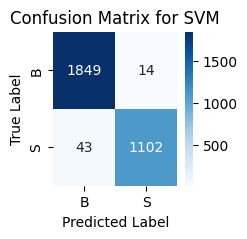

SVM Accuracy: 0.9811


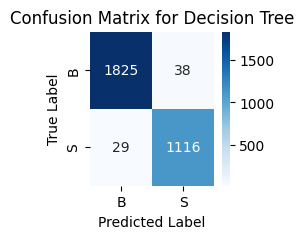

Decision Tree Accuracy: 0.9777


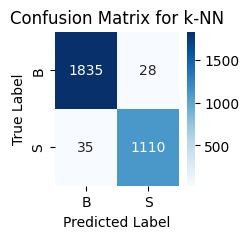

k-NN Accuracy: 0.9791


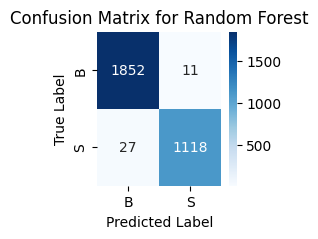

Random Forest Accuracy: 0.9874


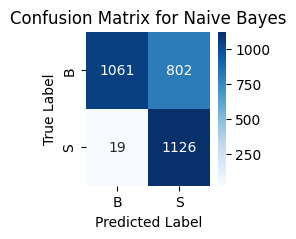

Naive Bayes Accuracy: 0.7271


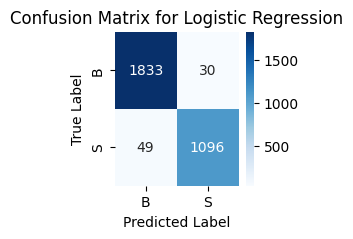

Logistic Regression Accuracy: 0.9737


In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train[selected_features], y_train)
    y_pred = clf.predict(X_test[selected_features])

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()

    # Accuracy
    accuracy = clf.score(X_test[selected_features], y_test)
    print(f"{clf_name} Accuracy: {accuracy:.4f}")